<a href="https://colab.research.google.com/github/senjuti238/Machine-Learning-practice/blob/main/SVM_Day13_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importing libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/datasets_586_1114_zoo.csv")

In [4]:
data.head()

animal_name  hair  feathers  eggs  ...  tail  domestic  catsize  class_type
0    aardvark     1         0     0  ...     0         0        1           1
1    antelope     1         0     0  ...     1         0        1           1
2        bass     0         0     1  ...     1         0        0           4
3        bear     1         0     0  ...     0         0        1           1
4        boar     1         0     0  ...     1         0        1           1

[5 rows x 18 columns]

In [5]:
data['animal_name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [6]:
data['animal_name'].nunique()

100

In [7]:
data.drop('animal_name', axis = 1, inplace=True)

In [8]:
data.head()

hair  feathers  eggs  milk  ...  tail  domestic  catsize  class_type
0     1         0     0     1  ...     0         0        1           1
1     1         0     0     1  ...     1         0        1           1
2     0         0     1     0  ...     1         0        0           4
3     1         0     0     1  ...     0         0        1           1
4     1         0     0     1  ...     1         0        1           1

[5 rows x 17 columns]

In [9]:
data.info

<bound method DataFrame.info of      hair  feathers  eggs  milk  ...  tail  domestic  catsize  class_type
0       1         0     0     1  ...     0         0        1           1
1       1         0     0     1  ...     1         0        1           1
2       0         0     1     0  ...     1         0        0           4
3       1         0     0     1  ...     0         0        1           1
4       1         0     0     1  ...     1         0        1           1
..    ...       ...   ...   ...  ...   ...       ...      ...         ...
96      1         0     0     1  ...     1         0        1           1
97      1         0     1     0  ...     0         0        0           6
98      1         0     0     1  ...     1         0        1           1
99      0         0     1     0  ...     0         0        0           7
100     0         1     1     0  ...     1         0        0           2

[101 rows x 17 columns]>

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   hair        101 non-null    int64
 1   feathers    101 non-null    int64
 2   eggs        101 non-null    int64
 3   milk        101 non-null    int64
 4   airborne    101 non-null    int64
 5   aquatic     101 non-null    int64
 6   predator    101 non-null    int64
 7   toothed     101 non-null    int64
 8   backbone    101 non-null    int64
 9   breathes    101 non-null    int64
 10  venomous    101 non-null    int64
 11  fins        101 non-null    int64
 12  legs        101 non-null    int64
 13  tail        101 non-null    int64
 14  domestic    101 non-null    int64
 15  catsize     101 non-null    int64
 16  class_type  101 non-null    int64
dtypes: int64(17)
memory usage: 13.5 KB


In [11]:
data.isnull().sum()

hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64

In [12]:
data['class_type'].value_counts()

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


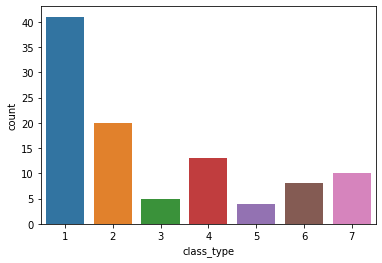

In [13]:
# countplot based on class_type

sns.countplot(data['class_type'])

In [14]:
# we need to separate class_1 from class_types

class_1 = data[data['class_type'] == 1]

In [15]:
data.head()

hair  feathers  eggs  milk  ...  tail  domestic  catsize  class_type
0     1         0     0     1  ...     0         0        1           1
1     1         0     0     1  ...     1         0        1           1
2     0         0     1     0  ...     1         0        0           4
3     1         0     0     1  ...     0         0        1           1
4     1         0     0     1  ...     1         0        1           1

[5 rows x 17 columns]

In [16]:
class_1.head()

hair  feathers  eggs  milk  ...  tail  domestic  catsize  class_type
0     1         0     0     1  ...     0         0        1           1
1     1         0     0     1  ...     1         0        1           1
3     1         0     0     1  ...     0         0        1           1
4     1         0     0     1  ...     1         0        1           1
5     1         0     0     1  ...     1         0        1           1

[5 rows x 17 columns]

In [17]:
class_1.nunique()

hair          2
feathers      1
eggs          2
milk          1
airborne      2
aquatic       2
predator      2
toothed       2
backbone      1
breathes      1
venomous      1
fins          2
legs          3
tail          2
domestic      2
catsize       2
class_type    1
dtype: int64

In [18]:
class_1['class_type'].value_counts()

1    41
Name: class_type, dtype: int64

In [19]:
# split x and y variables as idependent and dependent var

x = data.drop('class_type', axis=1)
y = data['class_type']

In [20]:
x

hair  feathers  eggs  milk  airborne  ...  fins  legs  tail  domestic  catsize
0       1         0     0     1         0  ...     0     4     0         0        1
1       1         0     0     1         0  ...     0     4     1         0        1
2       0         0     1     0         0  ...     1     0     1         0        0
3       1         0     0     1         0  ...     0     4     0         0        1
4       1         0     0     1         0  ...     0     4     1         0        1
..    ...       ...   ...   ...       ...  ...   ...   ...   ...       ...      ...
96      1         0     0     1         0  ...     0     2     1         0        1
97      1         0     1     0         1  ...     0     6     0         0        0
98      1         0     0     1         0  ...     0     4     1         0        1
99      0         0     1     0         0  ...     0     0     0         0        0
100     0         1     1     0         1  ...     0     2     1         0        0

[101 rows x 16 columns]

In [21]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: class_type, Length: 101, dtype: int64

In [22]:
# split the dataset into both training and testing sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [23]:
y_train.unique()

array([3, 1, 2, 4, 6, 7, 5])

In [24]:
y_test.unique()

array([5, 4, 1, 2, 7, 6])

In [25]:
# suild SVM algo

from sklearn.svm import SVC

model = SVC()

model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [31]:
# predicting the training data

tr_predict = model.predict(x_train)

In [32]:
# predicting test data

ts_predict = model.predict(x_test)

In [33]:
# get accuracy score of each var

from sklearn.metrics import accuracy_score

print("Training accuracy: ", accuracy_score(y_train, tr_predict))
print("testing accuracy: ", accuracy_score(y_test, ts_predict))

Training accuracy:  0.9625
testing accuracy:  1.0


In [34]:
# implement K-fold cross validation

from sklearn.model_selection import cross_val_score

svc_model = SVC()

In [35]:
model_cv = cross_val_score(svc_model, x, y, cv = 4)
model_cv

array([0.92307692, 0.96      , 0.92      , 0.88      ])

In [36]:
model_cv.mean()

0.9207692307692308

In [37]:
#changing the C Parameter

svc_c = SVC(C=10)
model_cv = cross_val_score(svc_c, x, y, cv = 4)

In [38]:
model_cv

array([0.96153846, 1.        , 0.92      , 0.96      ])

In [39]:
model_cv.mean()

0.9603846153846154

In [40]:
# give some kernel value to SVM. Default kernel value is linear

# its imp yo know whether data is linear or non linear

# if data is non linear(no relationship in values), then we need to convert to lineat

svc_c = SVC(C = 10, kernel = 'linear')

model_cv = cross_val_score(svc_c, x,y, cv = 4)

model_cv.mean()

0.9303846153846154